In [1]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

save = 0
data = {}
indice = []
valores = []
percent = []
networks = [
    'Facebook',
    'Delicious',
    'Digg',
    '.Docstoc',
    'Flickr',
    'Friendfeed',
    'Linkedid',
    'Mixx',
    'Myspace',
    'Ning',
    'Qik',
    'Scribd',
    'Twitter',
    'Upcoming', #second srtuctrure 13
    'Upstream',
    'Yelp',
    'Youtube' #second srtuctrure 16

]
webpage = urllib.request.urlopen('https://www.briansolis.com/2009/10/revealing-the-people-defining-social-networks/').read().decode()
bsWebpage = BeautifulSoup(webpage)
tags = bsWebpage('p')

for tag in tags:
   
    content = tag.find('img')
    finish = tag.find('span')
    if(content != None):
        if (content.get('src') == 'http://www.briansolis.com/wp-content/uploads/2009/10/facebook-logo.jpg'):
            save = 1
            
    if(finish != None):
        if (finish.get('style') == 'font-weight: bold;'):
            save = 0

    if (save == 1 ):
        if (tag.text != None and tag.text != '—' and tag.text != ''):
            valores.append(tag.text)
        else: 
            if (tag.text == '—'):
                newval = valores[:]
                indice.append(newval)
                valores.clear()
                
                
        


In [2]:
uniquevisitorsus = []
uniquevisitorsww = []
reachus = []
reachww = []
pageviewsus = []
pageviewsww = []
totalvisitsus = []
totalvisitsww = []
avgvisitspervisitorus = []
avgvisitspervisitorww = []
avgtimeonsiteus = []
avgtimeonsiteww = []
gendermale = []
genderfemale = []

childreninhouseholdyes = []
childreninhouseholdno = []

age0_17 = []
age18_34 = []
age35_54 = []
age55p = []

householdincome30k = []
householdincome60k = []
householdincome100k = []
householdincome100kp = []

educationschool = []
educationnocollege = []
educationcollege = []



In [3]:
r = 0 #indice de iteraciones en trafico
x = 0 #indice de iteraciones en datos
y = 0

for data in indice:
    if (data[0] == '30-day traffic, (U.S., Worldwide)'):
        for string in data[1].split('\n'):
                value = string.split('–')[1].split(',')
                value[0] = value[0].replace('%', '')
                value[0] = value[0].replace('s', '')
                value[0] = value[0].replace(' ', '')
                
                value[1] = value[1].replace('%', '')
                value[1] = value[1].replace('s', '')
                value[1] = value[1].replace(' ', '')
                
                if(isinstance(value[0], str) ):
                    if (value[0].count("K") == 1):
                        value[0] = (float(value[0].replace('K',''))*1000) / 1000000
                if(isinstance(value[0], str) ):
                    if (value[0].count("M") == 1):
                        value[0] = (float(value[0].replace('M',''))*1000000) / 1000000
                if(isinstance(value[0], str) ):
                    if (value[0].count("B") == 1):
                        value[0] = (float(value[0].replace('B',''))*1000000000) / 1000000
                
                if(isinstance(value[1], str) ):
                    if (value[1].count("K") == 1):
                        value[1] = (float(value[1].replace('K',''))*1000) / 1000000
                if(isinstance(value[1], str) ):
                    if (value[1].count("M") == 1):
                        value[1] = (float(value[1].replace('M',''))*1000000) / 1000000
                if(isinstance(value[1], str) ):
                    if (value[1].count("B") == 1):
                        value[1] = (float(value[1].replace('B',''))*1000000000 ) /1000000
                
                r = r+1
                
                if(r == 1):
                    uniquevisitorsus.append(value[0])
                    uniquevisitorsww.append(value[1])
                if(r == 2):
                    reachus.append(float(value[0]))
                    reachww.append(float(value[1]))
                if(r == 3):
                    pageviewsus.append(value[0])
                    pageviewsww.append(value[1])
                if(r == 4):
                    totalvisitsus.append(value[0])
                    totalvisitsww.append(value[1])
                if(r == 5):    
                    avgvisitspervisitorus.append(float(value[0]))
                    avgvisitspervisitorww.append(float(value[1]))
                if(r == 6):    
                    avgtimeonsiteus.append(value[0])
                    avgtimeonsiteww.append(value[1])
                    r = 0
        
        gendermale.append(int(data[2].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
        genderfemale.append(int(data[2].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
        
        
        age0_17.append( int(data[4].split('\n')[0].split(':')[1].replace(' ','').replace('%','')))
        age18_34.append( int(data[4].split('\n')[1].split(':')[1].replace(' ','').replace('%','')) + int(data[4].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
        age35_54.append( int(data[4].split('\n')[3].split(':')[1].replace(' ','').replace('%','')) + int(data[4].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
        age55p.append( int(data[4].split('\n')[5].split(':')[1].replace(' ','').replace('%','')) + int(data[4].split('\n')[6].split(':')[1].replace(' ','').replace('%','')))
        
        householdincome30k.append( int(data[6].split('\n')[0].split(':')[1].replace(' ','').replace('%','')))
        householdincome60k.append( int(data[6].split('\n')[1].split(':')[1].replace(' ','').replace('%','')) + int(data[6].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
        householdincome100k.append( int(data[6].split('\n')[3].split(':')[1].replace(' ','').replace('%','')) )
        householdincome100kp.append( int(data[6].split('\n')[4].split(':')[1].replace(' ','').replace('%','')) + int(data[6].split('\n')[5].split(':')[1].replace(' ','').replace('%','')))
        
        childreninhouseholdyes.append( int(data[8].split('\n')[0].split(':')[1].replace(' ','').replace('%','')))
        childreninhouseholdno.append( int(data[8].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
        
        educationschool.append( int(data[10].split('\n')[0].split(':')[1].replace(' ','').replace('%','')) + int(data[10].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
        educationnocollege.append( int(data[10].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
        educationcollege.append( int(data[10].split('\n')[3].split(':')[1].replace(' ','').replace('%','')) + int(data[10].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
        
    else:
        continueflag = False
        for string in data[1].split('\n'):
                uniquevisits = None
                totalvisits = None
                if (len(data[1].split('\n')) == 2):
                    uniquevisits = data[1].split('\n')[0].split(':')[1]
                    totalvisits = data[1].split('\n')[1].split(':')[1]
                elif  (len(data[1].split('\n')) == 3):
                    uniquevisits = data[1].split('\n')[1].split(':')[1]
                    totalvisits = data[1].split('\n')[2].split(':')[1]
                     
                if(continueflag == True):
                    continue    
   
                if(isinstance(uniquevisits, str) ):
                    if (uniquevisits.count("K") == 1):
                        uniquevisits = (float(uniquevisits.replace('K',''))*1000) / 1000000
                if(isinstance(uniquevisits, str) ):
                    if (uniquevisits.count("M") == 1):
                        uniquevisits = (float(uniquevisits.replace('M',''))*1000000) / 1000000
                if(isinstance(uniquevisits, str) ):
                    if (uniquevisits.count("B") == 1):
                        uniquevisits = (float(uniquevisits.replace('B',''))*1000000000) / 1000000
                
                if(isinstance(totalvisits, str) ):
                    if (totalvisits.count("K") == 1):
                        totalvisits = (float(totalvisits.replace('K',''))*1000) / 1000000
                if(isinstance(totalvisits, str) ):
                    if (totalvisits.count("M") == 1):
                        totalvisits = (float(totalvisits.replace('M',''))*1000000) / 1000000
                if(isinstance(totalvisits, str) ):
                    if (totalvisits.count("B") == 1):
                        totalvisits = (float(totalvisits.replace('B',''))*1000000000 ) /1000000
                        
                uniquevisitorsus.append(None)
                uniquevisitorsww.append(uniquevisits)
                reachus.append(None)
                reachww.append(None)
                pageviewsus.append(None)
                pageviewsww.append(None)
                totalvisitsus.append(None)
                totalvisitsww.append(totalvisits)
                avgvisitspervisitorus.append(None)
                avgvisitspervisitorww.append(None)
                avgtimeonsiteus.append(None)
                avgtimeonsiteww.append(None)
                continueflag = True
                
        if (x == 13):
            gendermale.append(int(data[2].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            genderfemale.append(int(data[2].split('\n')[3].split(':')[1].replace(' ','').replace('%','')))
            
            age0_17.append( int(data[6].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            age18_34.append( int(data[6].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            age35_54.append( int(data[6].split('\n')[3].split(':')[1].replace(' ','').replace('%','')))
            age55p.append( int(data[6].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
            
            householdincome30k.append( int(data[5].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            householdincome60k.append( int(data[5].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            householdincome100k.append( int(data[5].split('\n')[3].split(':')[1].replace(' ','').replace('%','')))
            householdincome100kp.append( int(data[5].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
            
            childreninhouseholdyes.append( int(data[4].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            childreninhouseholdno.append( int(data[4].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            
            educationschool.append( int(data[3].split('\n')[3].split(':')[1].replace(' ','').replace('%','')))
            educationnocollege.append( int(data[3].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            educationcollege.append( int(data[3].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            
        if (x == 16):
            gendermale.append(int(data[3].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            genderfemale.append(int(data[3].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            
            age0_17.append( int(data[7].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
            age18_34.append( int(data[7].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
            age35_54.append( int(data[7].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
            age55p.append( int(data[7].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
                 
            householdincome30k.append( int(data[6].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            householdincome60k.append( int(data[6].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            householdincome100k.append( int(data[6].split('\n')[3].split(':')[1].replace(' ','').replace('%','')))
            householdincome100kp.append( int(data[6].split('\n')[4].split(':')[1].replace(' ','').replace('%','')))
            
            childreninhouseholdyes.append( int(data[5].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            childreninhouseholdno.append( int(data[5].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            
            educationschool.append( int(data[4].split('\n')[3].split(':')[1].replace(' ','').replace('%','')))
            educationnocollege.append( int(data[4].split('\n')[1].split(':')[1].replace(' ','').replace('%','')))
            educationcollege.append( int(data[4].split('\n')[2].split(':')[1].replace(' ','').replace('%','')))
            
    x = x+1
          

In [4]:
educationcollege

[28, 46, 36, 37, 32, 40, 53, 27, 14, 25, 35, 38, 32, 42, 25, 46, 39]

In [5]:
indice[1][10].split('\n')

['Less than HS diploma: 4%',
 'High School: 7%',
 'Some College: 43%',
 'Bachelors Degree: 32%',
 'Graduate Degree: 14%']

In [6]:
indice[13][3].split('\n')

['Education', 'No College: 45%', 'College: 42%', 'Grad. School: 13%']

In [7]:
indice[16][4].split('\n')

['Education', 'No College: 48%', 'College: 39%', 'Grad. School: 13%']

In [8]:
Dataframe = pd.DataFrame(
    {
        'networks':networks,
        'uniquevisitorsus': uniquevisitorsus,
        'uniquevisitorsww': uniquevisitorsww,
        'reachus': reachus,
        'reachww': reachww,
        'pageviewsus': pageviewsus,
        'pageviewsww': pageviewsww,
        'totalvisitsus': totalvisitsus,
        'totalvisitsww': totalvisitsww,
        'avgvisitspervisitorus': avgvisitspervisitorus,
        'avgvisitspervisitorww': avgvisitspervisitorww,
        'avgtimeonsiteus': avgtimeonsiteus,
        'avgtimeonsiteww': avgtimeonsiteww,
        'gendermale': gendermale,
        'genderfemale': genderfemale,
        'childreninhouseholdyes': childreninhouseholdyes,
        'childreninhouseholdno': childreninhouseholdno,
        'age0_17': age0_17,
        'age18_34': age18_34,
        'age35_54': age35_54,
        'age55p': age55p,
        'householdincome30k': householdincome30k,
        'householdincome60k': householdincome60k,
        'householdincome100k': householdincome100k,
        'householdincome100kp': householdincome100kp,
        'educationschool': educationschool,
        'educationnocollege': educationnocollege,
        'educationcollege': educationcollege
    })

In [9]:
Dataframe

,networks,uniquevisitorsus,uniquevisitorsww,reachus,reachww,pageviewsus,pageviewsww,totalvisitsus,totalvisitsww,avgvisitspervisitorus,...,age18_34,age35_54,age55p,householdincome30k,householdincome60k,householdincome100k,householdincome100kp,educationschool,educationnocollege,educationcollege
0,Facebook,110.00,370.00,45.6,28.8,52000.0,160000.0,3100.00,8700.00,28.0,...,21,44,16,7,58,18,17,36,36,28
1,Delicious,1.20,4.60,0.5,0.4,31.0,97.0,7.20,21.00,6.0,...,27,52,17,22,45,20,13,11,43,46
2,Digg,9.00,23.00,3.9,1.8,230.0,410.0,53.00,98.00,5.9,...,27,47,14,14,53,20,14,25,39,36
3,.Docstoc,1.80,4.60,0.8,0.4,12.0,28.0,3.90,9.00,2.1,...,19,55,19,10,53,20,18,20,44,37
4,Flickr,19.00,73.00,8.3,5.7,1000.0,3000.0,94.00,280.00,4.9,...,28,46,14,12,56,18,14,27,41,32
5,Friendfeed,0.68,2.60,0.3,0.2,16.0,59.0,3.40,12.00,5.1,...,33,57,9,30,45,15,9,8,52,40
6,Linkedid,14.00,31.00,6.1,2.4,800.0,1400.0,85.00,160.00,6.0,...,19,59,20,11,41,23,26,13,34,53
7,Mixx,0.57,2.30,0.2,0.2,7.4,21.0,1.60,4.60,2.7,...,31,45,12,17,56,16,11,24,48,27
8,Myspace,61.00,120.00,26.1,9.1,32000.0,39000.0,1200.00,1500.00,19.0,...,22,35,9,7,74,11,8,44,42,14
9,Ning,5.60,18.00,2.4,1.4,250.0,650.0,28.00,74.00,5.0,...,27,45,13,13,62,14,11,27,48,25


In [10]:
Dataframe.dtypes

networks                   object
uniquevisitorsus          float64
uniquevisitorsww          float64
reachus                   float64
reachww                   float64
pageviewsus               float64
pageviewsww               float64
totalvisitsus             float64
totalvisitsww             float64
avgvisitspervisitorus     float64
avgvisitspervisitorww     float64
avgtimeonsiteus            object
avgtimeonsiteww            object
gendermale                  int64
genderfemale                int64
childreninhouseholdyes      int64
childreninhouseholdno       int64
age0_17                     int64
age18_34                    int64
age35_54                    int64
age55p                      int64
householdincome30k          int64
householdincome60k          int64
householdincome100k         int64
householdincome100kp        int64
educationschool             int64
educationnocollege          int64
educationcollege            int64
dtype: object

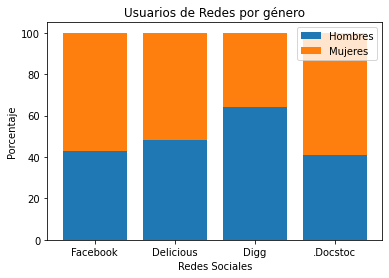

In [16]:
import numpy as np
import matplotlib.pyplot as plt
grupos = Dataframe['networks'][0:4]
hombres = Dataframe['gendermale'][0:4]
mujeres = Dataframe['genderfemale'][0:4]
 
indice = np.arange(len(grupos))
 
## Se crean las primeras barras
plt.bar(indice, hombres, label='Hombres')
 
## Se crean las segundas barras y se apilan sobre las primeras
plt.bar(indice, mujeres, label='Mujeres',  bottom=hombres)
 
plt.xticks(indice, grupos)
plt.ylabel("Porcentaje")
plt.xlabel("Redes Sociales")
plt.title('Usuarios de Redes por género')
plt.legend()
 
plt.show()

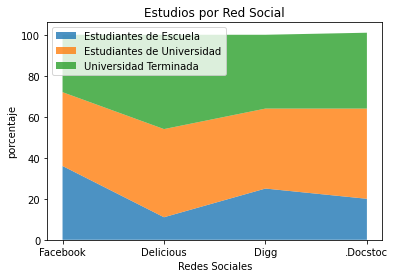

In [29]:
import numpy as np
import matplotlib.pyplot as plt


grupos = Dataframe['networks'][0:4]
educationschool = Dataframe['educationschool'][0:4]
educationnocollege = Dataframe['educationnocollege'][0:4]
educationcollege = Dataframe['educationcollege'][0:4]


studies_by_network = {
    'Estudiantes de Escuela': educationschool,
    'Estudiantes de Universidad': educationnocollege,
    'Universidad Terminada': educationcollege,
}


fig, ax = plt.subplots()
ax.stackplot(grupos, studies_by_network.values(),
             labels=studies_by_network.keys(), alpha=0.8)
ax.legend(loc='upper left')
ax.set_title('Estudios por Red Social')
ax.set_xlabel('Redes Sociales')
ax.set_ylabel('porcentaje')

plt.show()